In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.layers as layers
import random

import warnings 
warnings.filterwarnings("ignore")

from sklearn import svm
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#Read Training Data
data=pd.read_csv('./Dataset/train.csv')
data.shape

(891, 12)

In [3]:
#View first 10 rows of DataFrame
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Mathematical Description of Numerical Columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().any()
#Take Note that Age,Cabin,Embarked columns are null

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

# **EXPLORATORY DATA ANALYSIS**

## ** PClass **

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


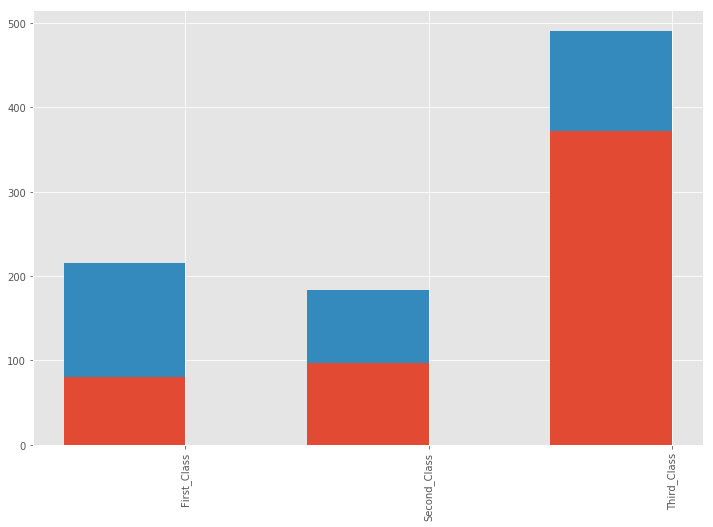

In [6]:
Pclass_Survived=data.groupby('Pclass')['Survived'].sum()
Pclass_Dead=data.groupby('Pclass')['Survived'].count()-Pclass_Survived

fig,ax=plt.subplots(figsize=(12,8))
ax.bar(range(3),Pclass_Dead,width=0.5)
ax.bar(range(3),Pclass_Survived,width=0.5,bottom=Pclass_Dead)
ax.set_xticks(np.arange(3) + 0.5/2)
ax.set_xticklabels(['First_Class','Second_Class','Third_Class'],rotation=90)
print(Pclass_Dead)
print(Pclass_Survived)

## ** SEX**

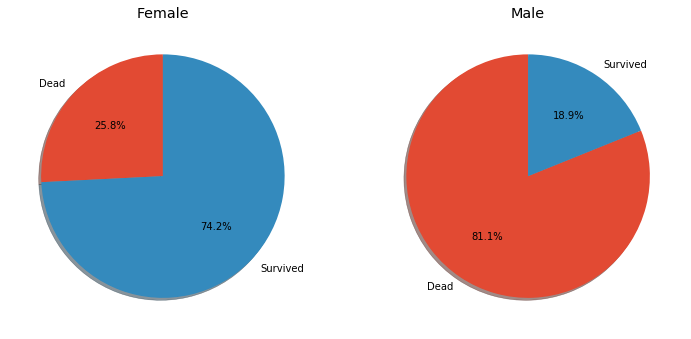

In [7]:
#Try to analyse if there is any correlation between Sex and Survival Rate

#Values for pie chart
Female_values=list(data.loc[data['Sex']=='female'].groupby('Survived').count()['Sex'])
Male_values=list(data.loc[data['Sex']=='male'].groupby('Survived').count()['Sex'])

#Labels for Pie Charts
labels=['Dead','Survived']

#Pie Chart
fig,(ax1,ax2) = plt.subplots(1,2,subplot_kw={'aspect':'equal'},figsize=(12,8))
ax1.set_title('Female')
ax2.set_title('Male')
ax1.pie(Female_values,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.pie(Male_values,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

## **AGE**

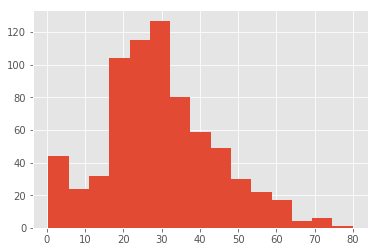

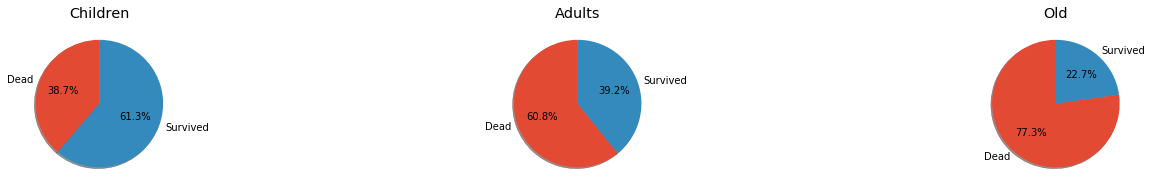

In [8]:
Non_Null_Rows=data.loc[data.Age.notnull(),['Age','Survived']]
plt.hist(Non_Null_Rows['Age'],bins=15)

Children_values=list(Non_Null_Rows.loc[Non_Null_Rows['Age']<10].groupby('Survived').count()['Age'])
Adult_values=list(Non_Null_Rows.loc[(Non_Null_Rows['Age']>=10) & (Non_Null_Rows['Age']<=60)].groupby('Survived').count()['Age'])
Old_values=list(Non_Null_Rows.loc[(Non_Null_Rows['Age']>60)].groupby('Survived').count()['Age'])

labels=['Dead','Survived']

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20),subplot_kw={'aspect':'equal'})
ax1.set_title('Children')
ax2.set_title('Adults')
ax3.set_title('Old')
ax1.pie(Children_values,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.pie(Adult_values,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.pie(Old_values,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.subplots_adjust(wspace=2)
plt.show()

## **FARE**

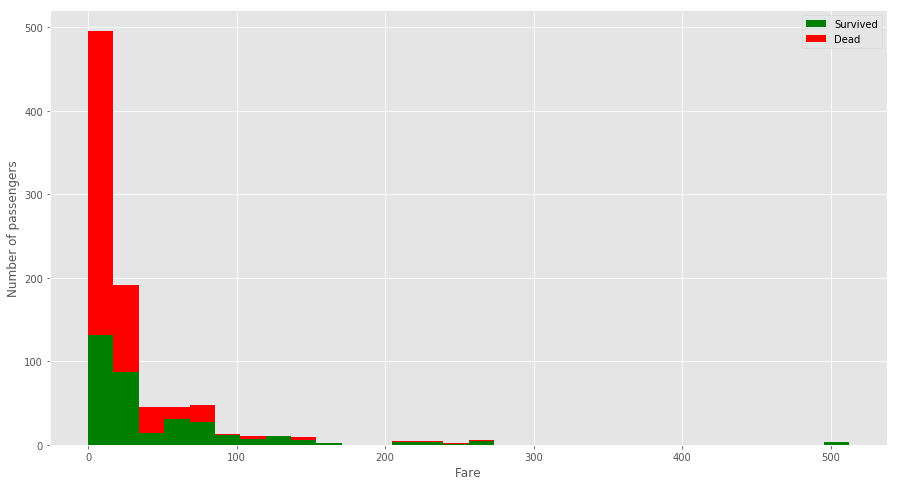

In [9]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

## ** EMBARKED**

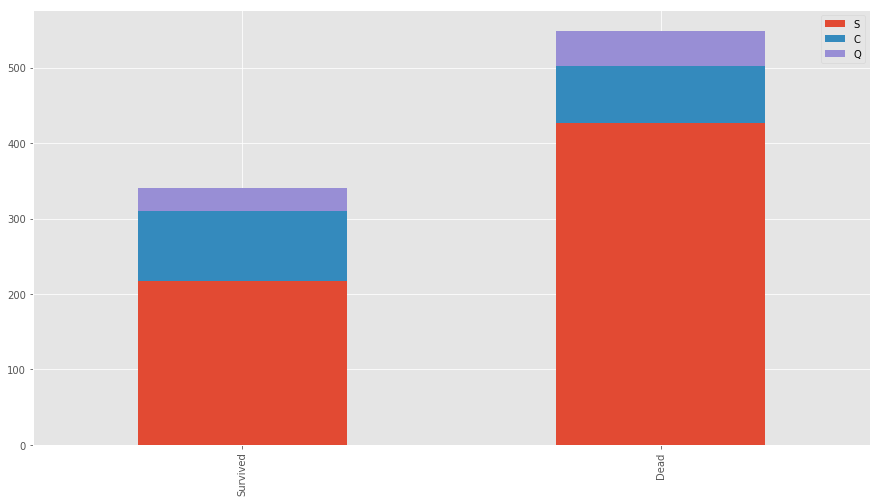

In [10]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

# FEATURE ENGINEERING

In [11]:
targets=data.Survived
data.drop('Survived',axis=1,inplace=True)

In [12]:
test=pd.read_csv('./Dataset/test.csv')
data = data.append(test)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.shape

(1309, 11)

In [14]:
data.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [15]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [16]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## PREPROCESSING DATA

### PCLASS

In [17]:
data=pd.concat([data,pd.get_dummies(data['Pclass'],prefix='Pclass')],axis=1)
data.drop('Pclass',axis=1,inplace=True)

### NAME

In [18]:
Title=[]
for name in data['Name']:
    try:
        found = re.search(', (.+?) .', name).group(1)
        #print("Title is {0} and name is {1}".format(found,name))
        found=found.replace(".","")
        Title.append(found)
    except AttributeError:
        print(AttributeError)

data['Title']=pd.Series(Title,index=data.index)
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }

for title in set(Title):
    data.loc[data['Title']==title,'Title']=Title_Dictionary[title]


data=pd.concat([data,pd.get_dummies(data['Title'])],axis=1)
data.drop(['Name'],axis=1,inplace=True)

### SEX

In [19]:
data.loc[data['Sex']=='male','Sex']=0
data.loc[data['Sex']=='female','Sex']=1

### FILLING NULL VALUES

#### AGE

In [20]:
data[880:]

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Title,Master,Miss,Mr,Mrs,Officer,Royalty
880,881,1,25.0,0,1,230433,26.0000,NaN,S,0,1,0,Mrs,0,0,0,1,0,0
881,882,0,33.0,0,0,349257,7.8958,NaN,S,0,0,1,Mr,0,0,1,0,0,0
882,883,1,22.0,0,0,7552,10.5167,NaN,S,0,0,1,Miss,0,1,0,0,0,0
883,884,0,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0,1,0,Mr,0,0,1,0,0,0
884,885,0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0,0,1,Mr,0,0,1,0,0,0
885,886,1,39.0,0,5,382652,29.1250,NaN,Q,0,0,1,Mrs,0,0,0,1,0,0
886,887,0,27.0,0,0,211536,13.0000,NaN,S,0,1,0,Officer,0,0,0,0,1,0
887,888,1,19.0,0,0,112053,30.0000,B42,S,1,0,0,Miss,0,1,0,0,0,0
888,889,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,Miss,0,1,0,0,0,0
889,890,0,26.0,0,0,111369,30.0000,C148,C,1,0,0,Mr,0,0,1,0,0,0


In [21]:
Regression_data=data.drop(data.columns[[5,6,7,8,12]],axis=1)
Non_Null_Rows=Regression_data.loc[Regression_data.Age.notnull()]
Null_Rows=Regression_data.loc[Regression_data.Age.isnull()]
X_train=(Non_Null_Rows.drop(['PassengerId','Age'],axis=1)).as_matrix()
Y_train=(Non_Null_Rows['Age']).as_matrix()
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
predictions=np.round(regr.predict(X_train))
for i in range(10):
    print("Prediction is {0} and True Value is {1} ".format(predictions[i],Y_train[i]))

print("Median of Age Data {0}".format(Non_Null_Rows['Age'].median()))
print("Mean Squared Error When you use Regression {0}".format(np.mean((predictions-Y_train)**2)))
print("Mean Squared Error When you use Median {0}".format(np.mean((28-Y_train)**2)))

X_test=(Null_Rows.drop(['PassengerId','Age'],axis=1)).as_matrix()
Fill_Age=pd.Series(np.abs(np.round(regr.predict(X_test))),index=np.where(data['Age'].isnull())[0])
data['Age'].fillna(Fill_Age,inplace=True)

Prediction is 28.0 and True Value is 22.0 
Prediction is 43.0 and True Value is 38.0 
Prediction is 19.0 and True Value is 26.0 
Prediction is 43.0 and True Value is 35.0 
Prediction is 29.0 and True Value is 35.0 
Prediction is 41.0 and True Value is 54.0 
Prediction is 3.0 and True Value is 2.0 
Prediction is 32.0 and True Value is 27.0 
Prediction is 34.0 and True Value is 14.0 
Prediction is 17.0 and True Value is 4.0 
Median of Age Data 28.0
Mean Squared Error When you use Regression 120.31806892925431
Mean Squared Error When you use Median 211.0888528680688


In [22]:
data.isnull().sum()

PassengerId       0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Pclass_1          0
Pclass_2          0
Pclass_3          0
Title             0
Master            0
Miss              0
Mr                0
Mrs               0
Officer           0
Royalty           0
dtype: int64

#### FARE


In [23]:
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

#### CABIN

In [24]:
data['Cabin'].fillna('U',inplace=True)
data['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [25]:
for cabin in data['Cabin']:
    data.loc[data['Cabin']==cabin,'Cabin']=cabin[0]
data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [26]:
data=pd.concat([data,pd.get_dummies(data['Cabin'],prefix='Cabin')],axis=1)
data.drop(['Cabin'],axis=1,inplace=True)

#### EMBARKED

In [27]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
data['Embarked'].fillna('S',inplace=True)

In [29]:
data=pd.concat([data,pd.get_dummies(data['Embarked'],prefix='Embarked')],axis=1)
data.drop(['Embarked'],axis=1,inplace=True)

### SIBSP, PARCH

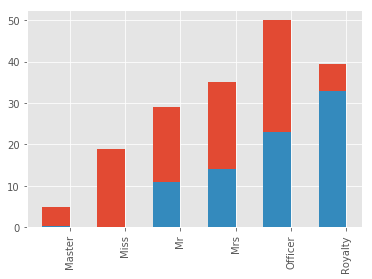

In [30]:
Age_median=data.groupby('Title')['Age'].median()
Age_min=data.groupby('Title')['Age'].min()
fig,ax = plt.subplots()
Title_Labels=data['Title'].unique()
ax.bar(range(len(Title_Labels)),Age_median,width=0.5)
ax.bar(range(len(Title_Labels)),Age_min,width=0.5)
ax.set_xticks(np.arange(len(Title_Labels)) + 0.5/2)
ax.set_xticklabels(sorted(Title_Labels,key=str.lower), rotation=90)

columns=['Sib','Spouse','Parents','Children','Age']
data_to_append=pd.DataFrame(columns=columns)
data_to_append['Age']=data['Age']
data_to_append.loc[data_to_append['Age']<18,'Sib']=data.loc[data['Age']<18,'SibSp']
data_to_append.loc[data_to_append['Age']<18,'Spouse']=0
data_to_append.loc[data_to_append['Age']<18,'Parents']=data.loc[data['Age']<18,'Parch']
data_to_append.loc[data_to_append['Age']<18,'Children']=0

data_to_append.loc[data_to_append['Age']>=18,'Spouse']=data.loc[data['Age']>=18,'SibSp']
data_to_append.loc[data_to_append['Age']>=18,'Sib']=0
data_to_append.loc[data_to_append['Age']>=18,'Children']=data.loc[data['Age']>=18,'Parch']
data_to_append.loc[data_to_append['Age']>=18,'Parents']=0

data_to_append.drop('Age',axis=1,inplace=True)
data_to_append.head()
data=pd.concat([data,data_to_append],axis=1)

In [31]:
data.drop(['SibSp','Parch'],axis=1,inplace=True)

### TICKET

In [32]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = [t.strip() for t in ticket]
    ticket = [t for t in ticket if not t.isdigit()]
    if len(list(ticket)) > 0:
        return ticket[0]
    else: 
        return 'XXX'
    

# Extracting dummy variables from tickets:

data['Ticket'] = data['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(data['Ticket'], prefix='Ticket')
data = pd.concat([data, tickets_dummies], axis=1)
data.drop('Ticket', inplace=True, axis=1)

In [33]:
data.shape

(1309, 67)

In [34]:
data.head()

,PassengerId,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Title,Master,Miss,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,0,22.0,7.2500,0,0,1,Mr,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,38.0,71.2833,1,0,0,Mrs,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,1,Miss,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4,1,35.0,53.1000,1,0,0,Mrs,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,8.0500,0,0,1,Mr,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data.drop(['Title'],axis=1,inplace=True)

# MODELS

## RANDOM_FOREST CLASSIFIER

(891, 14)


(418, 14)

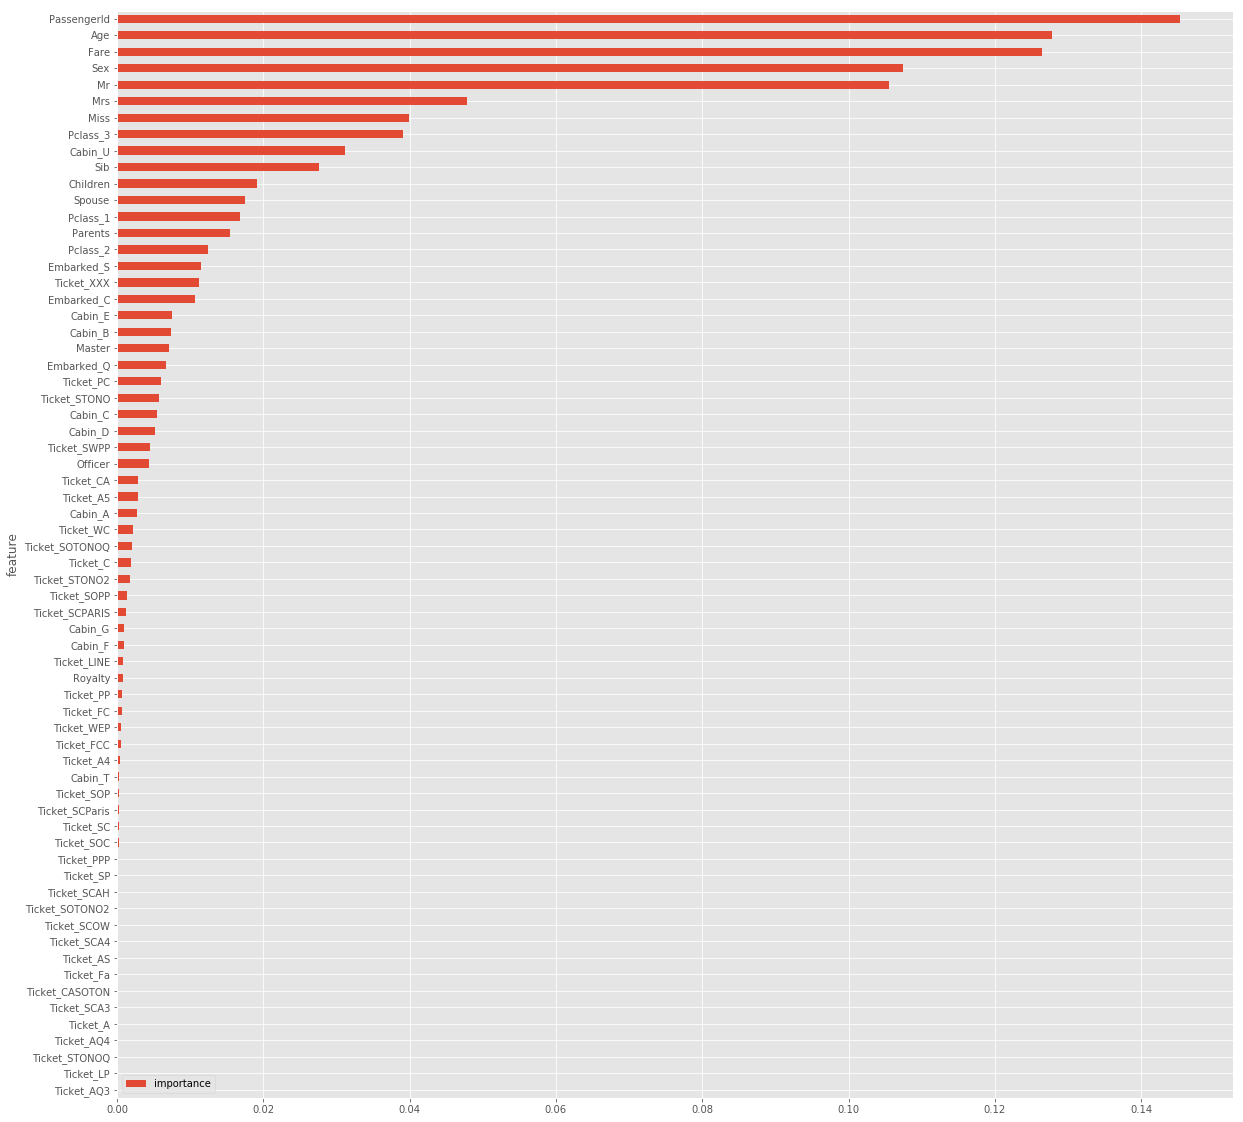

In [36]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)


def recover_train_test_target():
    global data
    train = data.head(891)
    test = data.iloc[891:]
    
    return train, test
train, test = recover_train_test_target()

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(train, targets)

features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(20, 20))

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

test_reduced = model.transform(test)
test_reduced.shape

In [37]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [7, 9, 11],
                 'n_estimators': [300, 200],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [15, 10, 3],
                 'min_samples_leaf': [10, 15, 3],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train_reduced, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)
    print(compute_score(model, train, targets, scoring='accuracy'))

0.815954183773


## GRADIENT_BOOSTING CLASSIFIER

In [ ]:
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [7, 6, 9],
                 'n_estimators': [50, 100],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [15, 70, 3],
                 'min_samples_leaf': [70, 15, 3],
                 }
    GBM = GradientBoostingClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(GBM,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

## SUPPORT VECTOR MACHINES

### SVM with Linear Kernel

In [ ]:
model=svm.SVC(kernel='linear',C=1.0).fit(train,targets)
predictions=model.predict(train)
print(np.mean(predictions==targets))

### SVM with RBF Kernel

In [ ]:
model=svm.SVC(kernel='rbf',C=1000.0).fit(train,targets)
predictions=model.predict(train)
print(np.mean(predictions==targets))

### SVM with Polynomial Kernel

In [ ]:
model=svm.SVC(kernel='poly',degree=3,C=C).fit(train,targets)
predictions=model.predict(train)
print(np.mean(predictions==targets))

## NEURAL NETWORK CLASSIFIER

In [38]:
max_train=np.max(train_reduced[:,2])
max_test=np.max(test_reduced[:,2])
train_reduced[:,2]=(train_reduced[:,2])/max_train
test_reduced[:,2]=(test_reduced[:,2])/max_test

In [39]:
print(test_reduced[:,2])

[ 0.45394737  0.61842105  0.81578947  0.35526316  0.28947368  0.18421053
  0.39473684  0.34210526  0.23684211  0.27631579  0.38157895  0.60526316
  0.30263158  0.82894737  0.61842105  0.31578947  0.46052632  0.27631579
  0.35526316  0.59210526  0.72368421  0.11842105  0.57894737  0.27631579
  0.63157895  0.65789474  0.28947368  0.29605263  0.53947368  0.34210526
  0.65789474  0.31578947  0.43421053  0.39473684  0.39473684  0.24342105
  0.25        0.27631579  0.32894737  0.38157895  0.51315789  0.53947368
  0.53947368  0.39473684  0.59210526  0.32894737  0.59210526  0.38157895
  0.78947368  0.47368421  0.31578947  0.35526316  0.26315789  0.36842105
  0.42105263  0.13157895  0.46052632  0.32894737  0.36842105  0.47368421
  0.22368421  0.42105263  0.23684211  0.28947368  0.17105263  0.46052632
  0.23684211  0.61842105  0.40789474  0.78947368  0.31578947  0.27631579
  0.38157895  0.375       0.46052632  0.42763158  0.38157895  0.72368421
  0.39473684  0.31578947  0.07894737  0.88157895  0

In [40]:

#Building the Neural Network
batch_size=9
epochs=150
n_features=train_reduced.shape[1] #Using all features leads to overfitting

inputs=tf.placeholder("float",[None,n_features],name="inputs")
labels=tf.placeholder("float",[None,1])

hidden_1=layers.fully_connected(inputs=inputs,num_outputs=10,normalizer_fn=layers.batch_norm)
hidden_2=layers.fully_connected(inputs=hidden_1,num_outputs=10,normalizer_fn=layers.batch_norm)

logits=layers.fully_connected(inputs=hidden_2,num_outputs=1)

cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=labels))
#A weird observation, if I use softmax i get train loss as 0


optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

predicted = tf.nn.sigmoid(logits,name="predictions")
correct_pred = tf.equal(tf.round(predicted),labels)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


#Train the Network
init=tf.global_variables_initializer()
saver=tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    total_loss=0
    total_acc=0
    max_acc=0.0
    for epoch in range(epochs):
        for iteration in range(99):
            '''indices=range(batch_size*iteration,batch_size*(iteration+1))
            batch_x=[train_reduced[batch] for batch in indices]
            batch_y=np.reshape([targets.iloc[batch] for batch in indices],[batch_size,1]) 
            feed={inputs:batch_x,labels:batch_y} '''
            feed={inputs:train_reduced,labels:np.reshape(np.asarray(targets),[891,1])}
            predictions,train_loss,train_acc,_=sess.run([predicted,cost,accuracy,optimizer],feed_dict=feed)
            total_loss+=train_loss
            total_acc+=train_acc
        
        if(epoch%1==0):
            print("Epoch {0}: Train Loss is {1}, Train Accuracy is {2}".format(epoch,(total_loss)/100,(total_acc)/100))
            #if(epoch==199):
            saver.save(sess,"./saver/my-model",global_step=epoch)
            print("Model Saved with accuracy {0}".format((total_acc)/100))
            #print(predictions)
            #max_acc=(total_acc)/50.0            
            total_loss=0
            total_acc=0

    

Epoch 0: Train Loss is 0.7088582235574722, Train Accuracy is 0.5820089891552925
Model Saved with accuracy 0.5820089891552925
Epoch 1: Train Loss is 0.6660328996181488, Train Accuracy is 0.6910213589668274
Model Saved with accuracy 0.6910213589668274
Epoch 2: Train Loss is 0.6138302767276764, Train Accuracy is 0.7670146083831787
Model Saved with accuracy 0.7670146083831787
Epoch 3: Train Loss is 0.5906250083446503, Train Accuracy is 0.7877216744422912
Model Saved with accuracy 0.7877216744422912
Epoch 4: Train Loss is 0.5847550094127655, Train Accuracy is 0.7944893497228622
Model Saved with accuracy 0.7944893497228622
Epoch 5: Train Loss is 0.580581612586975, Train Accuracy is 0.8022222310304642
Model Saved with accuracy 0.8022222310304642
Epoch 6: Train Loss is 0.5767806577682495, Train Accuracy is 0.8054321146011353
Model Saved with accuracy 0.8054321146011353
Epoch 7: Train Loss is 0.5734245532751083, Train Accuracy is 0.8087317627668381
Model Saved with accuracy 0.8087317627668381
E

Model Saved with accuracy 0.8530864471197128
Epoch 66: Train Loss is 0.520334222316742, Train Accuracy is 0.8535578227043152
Model Saved with accuracy 0.8535578227043152
Epoch 67: Train Loss is 0.520175598859787, Train Accuracy is 0.8537935149669648
Model Saved with accuracy 0.8537935149669648
Epoch 68: Train Loss is 0.5200544053316116, Train Accuracy is 0.8537822884321212
Model Saved with accuracy 0.8537822884321212
Epoch 69: Train Loss is 0.5197100114822387, Train Accuracy is 0.8542199969291687
Model Saved with accuracy 0.8542199969291687
Epoch 70: Train Loss is 0.5197052597999573, Train Accuracy is 0.8545567059516906
Model Saved with accuracy 0.8545567059516906
Epoch 71: Train Loss is 0.5197533190250396, Train Accuracy is 0.854276123046875
Model Saved with accuracy 0.854276123046875
Epoch 72: Train Loss is 0.5195170390605927, Train Accuracy is 0.8549158489704132
Model Saved with accuracy 0.8549158489704132
Epoch 73: Train Loss is 0.5192220669984817, Train Accuracy is 0.8550280821323

Model Saved with accuracy 0.8646689599752426
Epoch 131: Train Loss is 0.512444692850113, Train Accuracy is 0.8644557172060012
Model Saved with accuracy 0.8644557172060012
Epoch 132: Train Loss is 0.5127767926454544, Train Accuracy is 0.8640067768096924
Model Saved with accuracy 0.8640067768096924
Epoch 133: Train Loss is 0.5121640062332153, Train Accuracy is 0.8648148703575135
Model Saved with accuracy 0.8648148703575135
Epoch 134: Train Loss is 0.5119890123605728, Train Accuracy is 0.8646128380298614
Model Saved with accuracy 0.8646128380298614
Epoch 135: Train Loss is 0.5121158653497696, Train Accuracy is 0.8649158656597138
Model Saved with accuracy 0.8649158656597138
Epoch 136: Train Loss is 0.5106719374656677, Train Accuracy is 0.8672390919923783
Model Saved with accuracy 0.8672390919923783
Epoch 137: Train Loss is 0.5108030790090561, Train Accuracy is 0.8669697237014771
Model Saved with accuracy 0.8669697237014771
Epoch 138: Train Loss is 0.5103872120380402, Train Accuracy is 0.86

In [43]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./saver/my-model-149.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./saver/'))
    graph = tf.get_default_graph()
    
    inputs=graph.get_tensor_by_name("inputs:0")
    feed={inputs:train_reduced}
    predictions=graph.get_tensor_by_name("predictions:0")
    predictions=(np.round(sess.run(predictions,feed_dict=feed))).astype(int)
    print(predictions)
    print(targets)
    print(type(predictions))
    #predictions=np.asarray(predictions)
    correct_pred = np.equal(predictions,np.reshape(np.asarray(targets),[891,1]))
    accuracy = np.mean(correct_pred.astype("float"))
    print((accuracy))

INFO:tensorflow:Restoring parameters from ./saver/my-model-149
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [

In [45]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./saver/my-model-149.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./saver/'))
    graph = tf.get_default_graph()
    
    inputs=graph.get_tensor_by_name("inputs:0")
    feed={inputs:test_reduced}
    predictions=graph.get_tensor_by_name("predictions:0")
    predictions=(np.round(sess.run(predictions,feed_dict=feed))).astype(int)
    df_output = pd.DataFrame()
    aux = pd.read_csv('./Dataset/test.csv')
    df_output['PassengerId'] = aux['PassengerId']
    df_output['Survived'] = predictions
    df_output[['PassengerId','Survived']].to_csv('./Dataset/output.csv',index=False)

INFO:tensorflow:Restoring parameters from ./saver/my-model-149


In [ ]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,".\\saver\\model.ckpt")
    output=(np.round(sess.run(predicted,feed_dict={inputs:train_reduced}))).astype(int)
    print(sess.run(hidden))
    correct_pred = tf.equal(output,np.reshape(np.asarray(targets),[891,1]))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print(sess.run(accuracy))
    '''df_output = pd.DataFrame()
    aux = pd.read_csv('./Dataset/test.csv')
    df_output['PassengerId'] = aux['PassengerId']
    df_output['Survived'] = output
    df_output[['PassengerId','Survived']].to_csv('./Dataset/output.csv',index=False) '''

In [ ]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('./Dataset/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./Dataset/output.csv',index=False)